In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../..')

In [141]:
from glob import glob
import os
import time

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from util.file_util import StockTwitsFileReader

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 150)

In [5]:
file_reader = StockTwitsFileReader()

In [6]:
date = '2019-08-09'
ticker = 'SHAK'

In [7]:
temp_df = file_reader.read_twit_file(ticker, date)

In [8]:
temp_df.head(2).T

,0,1
body,$SHAK CLDR Boys next call on Monday after the drop . One to look at anyways 👍,$SHAK new insider selling: 40987 shares. http://insiderbuyingselling.com/?t=SHAK
conversation.in_reply_to_message_id,NaN,NaN
conversation.parent,NaN,NaN
conversation.parent_message_id,NaN,NaN
conversation.replies,NaN,NaN
created_at,2019-08-10 03:46:47,2019-08-10 00:41:37
created_at_est,2019-08-09 23:46:47,2019-08-09 20:41:37
date_est,2019-08-09,2019-08-09
entities.chart.large,None,None
entities.chart.original,None,None


#### Lets Think about User information question later (for ex, is this user reliable?)
- For now, just focus on the message

In [9]:
COLS_OF_INTEREST = [
    'date_est',
    'created_at_est',
    'body',
    'symbols',
    'entities.sentiment.basic',
    'links',
]

In [10]:
sentiment_cols = [c for c in temp_df.columns if 'sentiment' in c]

In [11]:
temp_df[sentiment_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
entities.sentiment                                  0 non-null float64
entities.sentiment.basic                            22 non-null object
reshare_message.message.entities.sentiment          0 non-null float64
reshare_message.message.entities.sentiment.basic    0 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [12]:
temp_df_new = file_reader.read_twit_file(ticker, date, cols='default')

In [13]:
temp_df_new.head()

,date_est,created_at_est,body,symbols,entities.sentiment.basic,links
0,2019-08-09,2019-08-09 23:46:47,$SHAK CLDR Boys next call on Monday after the drop . One to look at anyways 👍,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9548}]",None,None
1,2019-08-09,2019-08-09 20:41:37,$SHAK new insider selling: 40987 shares. http://insiderbuyingselling.com/?t=SHAK,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9547}]",None,"[{'title': 'Tracking insider buying and selling stocks for Shake Shack Inc. ( SHAK )', 'url': 'http://insiderbuyingselling.com/?t=SHAK', 'shortene..."
2,2019-08-09,2019-08-09 20:14:08,$SHAK how is institutional ownership 106%? Educate me dont belittle me please.,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9547}]",None,None
3,2019-08-09,2019-08-09 19:56:51,"$SHAK So far Zach Koff was the insider who dumped at the highest price. If they are exercising their options and dumping them immediately, why are...","[{'id': 679, 'symbol': 'SPX', 'title': 'S&P 500 Index', 'aliases': [], 'is_following': False, 'watchlist_count': 42321}, {'id': 4979, 'symbol': 'D...",Bearish,None
4,2019-08-09,2019-08-09 19:26:32,$SHAK all these big dumps and price goes up? What gives?,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9548}]",Bearish,None


## Read for time range

In [14]:
ticker = 'SHAK'

start_date = '2018-01-01'
end_date = '2019-08-01'

Problem - below takes too long, I should cache it

In [15]:
%%time

data_df = file_reader.read_twit_file_in_range(ticker, start_date, end_date, cols='default')

CPU times: user 39.6 s, sys: 457 ms, total: 40 s
Wall time: 40.7 s


In [16]:
data_df.shape

(8664, 6)

In [17]:
data_df['entities.sentiment.basic'].value_counts(dropna=False)

NaN        6554
Bearish    1067
Bullish    1043
Name: entities.sentiment.basic, dtype: int64

In [18]:
root_dir = file_reader.get_root_dir()
scrap_data_dir = os.path.join(root_dir, 'scrap_data')
scrap_data_dir

'/Users/seung-jae_bang/Personal/Research/Stock_Sentiment/data/Stocktwits/scrap_data'

In [21]:
TICKER_LIST = [
    'SHAK',
    'MSFT',
    'TSLA',
    'SBUX'
]

In [22]:
for t in tqdm(TICKER_LIST):
    df = file_reader.read_twit_file_in_range(t, start_date, end_date, cols='default')
    df.to_pickle(os.path.join(scrap_data_dir, 
                              '{ticker}_{start_date}_{end_date}.pkl'.format(ticker=t,
                                                                            start_date=start_date,
                                                                            end_date=end_date)))

100%|██████████| 4/4 [03:37<00:00, 51.38s/it]


In [23]:
data_df.loc[data_df['entities.sentiment.basic'] == 'Bearish', 'body'].sample(10).to_frame()

,body
6538,"$SHAK IMO, this has become a decent SHORT again. Personally will wait to see if it gets to mid $50 B4 doing anything-due 2 current $ limits"
6104,$SHAK sell sell sell
5618,$SHAK painfully SHORT. Added a bit to my SHORT position earlier today. Need another owner to sell some shares!
2256,$SHAK still see 57 EOD
5668,"Covered half $SHAK earlier at target 57.45 for 61¢ net gain following Fri callaways and re-shorted the leg at 58¼ (not high enough, I see)."
2651,$SHAK
5701,"$SHAK EPS = 100. Despite the pump going on, there is only one conclusion for the logical mid-term play on this stock: go SHORT."
4138,$SHAK\n\nBurn you filthy 🐷
4301,"$SHAK something is not right, this POS doesn&#39;t wanna go down...Buyout Offer is looming?"
930,"$SHAK I like to hunt my food, thank for very much"


In [24]:
data_df.loc[data_df['entities.sentiment.basic'] == 'Bullish', 'body'].sample(10).to_frame()

,body
7057,$SHAK nice bounce up...
1216,$SHAK We have a clear Sky...!!
7223,$SHAK SHAK: You better love this name.. Marking all the ST price targets. They will happen fast N furious.\nI have these
3799,"bought in October $SHAK and $CMG , nearly 100% gain on shake shack!!! stay long"
58,$SHAK lets go get back up there
96,$SHAK 50 soon
5427,$SHAK 60+ by Friday or sooner
5212,$CMG up $16 but only 4%. Fuvkin love my 100 shares of #CMG baaaby $CMG $YUM $MCD $SHAK $DPZ
2735,$SHAK This type of setup is truly what I call a no brainer (with a reasonable stop) Take em when you can get em.
4537,$FB Chart analysis updated. Next week $AAPL $ROKU $DBX $SHAK $MOMO $SIG $SQ $IQ $NFLX $TSLA $COUP $SPY Have a great weekend traders!


## Summarize Stats

In [25]:
cache_file_format = '{ticker}_{start_date}_{end_date}.pkl'

In [26]:
data_dict = dict()

In [27]:
for t in TICKER_LIST:
    temp = pd.read_pickle(os.path.join(scrap_data_dir, 
                                       cache_file_format.format(ticker=t,
                                                                start_date=start_date,
                                                                end_date=end_date,)))
    temp['ticker'] = t
    data_dict[t] = temp

In [28]:
all_df = pd.concat(data_dict.values())

In [29]:
n_days = all_df['date_est'].nunique()
n_days

578

Twit Count Stat

In [33]:
count_df = all_df.groupby('ticker')['date_est'].count().to_frame('count')
count_df['count_per_day'] = (count_df['count'] / n_days).round(2)
count_df

,count,count_per_day
ticker,,
MSFT,93683,162.08
SBUX,29567,51.15
SHAK,8664,14.99
TSLA,634634,1097.98


In [34]:
sentiment_count_df = all_df.groupby('ticker').apply(
    lambda x: x['entities.sentiment.basic'].value_counts(dropna=True)).reset_index()

sentiment_count_df.columns = ['ticker', 'sentiment_type', 'count']
sentiment_count_df = sentiment_count_df.pivot(
    index='ticker', columns='sentiment_type', values=['count'])

sentiment_count_df.columns = sentiment_count_df.columns.levels[1]
sentiment_count_df.columns.name = None
sentiment_count_df['total_sentiment_count'] = sentiment_count_df['Bearish'] + sentiment_count_df['Bullish']
sentiment_count_df

,Bearish,Bullish,total_sentiment_count
ticker,,,
MSFT,4887,30605,35492
SBUX,3793,5846,9639
SHAK,1067,1043,2110
TSLA,115769,213872,329641


In [35]:
count_df = count_df.merge(sentiment_count_df, left_index=True, right_index=True)
count_df['pct_sentiment'] = count_df['total_sentiment_count'] / count_df['count']
count_df

,count,count_per_day,Bearish,Bullish,total_sentiment_count,pct_sentiment
ticker,,,,,,
MSFT,93683,162.08,4887,30605,35492,0.378852
SBUX,29567,51.15,3793,5846,9639,0.326005
SHAK,8664,14.99,1067,1043,2110,0.243536
TSLA,634634,1097.98,115769,213872,329641,0.519419


### Investigate Hyperlinks

In [39]:
pd.set_option('display.max_colwidth', 500)

In [49]:
def extract_link_info(row):
    temp = row['links'][0]
    return pd.Series(temp)

In [55]:
link_df = all_df.dropna(subset=['links'])[['body', 'links']].sample(3)

In [56]:
link_df.assign(**link_df.apply(extract_link_info, axis=1))[['body', 'title', 'url', 'description']]

,body,title,url,description
245559,"$TSLA watch it &amp; weep, bears https://www.youtube.com/watch?v=pAS-yjWj9DY",Munro Teardown Shows Tesla Model 3 Solidly Profitable,https://www.youtube.com/watch?v=pAS-yjWj9DY,"Munro & Associates finished its teardown and analysis of the Tesla Model 3, and the results are startling. Sandy Munro, the president of the company, says his first impressions of the car kind of misled him, and that now he has to eat crow. It's all got to do with the potential profitability of the car."
13053,$TSLA estimates distribution - here’s what 268 Estimize analysts are expecting $TSLA to report for Q4 [Reporting 02/07 AMC]\nhttp://www.estimize.com/intro/tsla?chart=scatter-plot&amp;amp;metric_name=eps&amp;amp;utm_content=TSLA&amp;amp;utm_medium=distribution&amp;amp;utm_source=stocktwits,TSLA - Tesla Inc. Crowdsourced Earnings Estimates - Estimize,http://www.estimize.com/intro/tsla?chart=scatter-plot&amp;metric_name=eps&amp;utm_content=TSLA&amp;utm_medium=distribution&amp;utm_source=stocktwits,"Earnings estimates for TSLA from thousands of professional and amateur analysts who contribute to a open, crowdsourced estimate data set."
76075,$MSFT closes within previous day&#39;s range after lackluster session: https://techniquant.com/reports/stock-msft-daily-technical-analysis-report-for-2019-04-29/,MSFT closes within previous day's range after lackluster session,https://techniquant.com/reports/stock-msft-daily-technical-analysis-report-for-2019-04-29/,"Highlights Overview MSFT ended Monday at 129.77 losing $0.12 (-0.09%) on low volume, slightly underperforming the Nasdaq 100 (0.16%). Closing within the prior day's range, prices failed to decisively move beyond the previous day's trading range in a lackluster session."


#### Look at Labeled Samples

In [77]:
N_SAMPLES = 4

In [78]:
bullish_dfs = []
bearish_dfs = []

In [79]:
all_bullish_df = all_df[all_df['entities.sentiment.basic'] == 'Bullish']
all_bearish_df = all_df[all_df['entities.sentiment.basic'] == 'Bearish']

In [80]:
for _, df in all_bullish_df.groupby('ticker'):
    bullish_dfs.append(df[['body', 'ticker', 'entities.sentiment.basic']].sample(N_SAMPLES))
    
for _, df in all_bearish_df.groupby('ticker'):
    bearish_dfs.append(df[['body', 'ticker', 'entities.sentiment.basic']].sample(N_SAMPLES))

In [81]:
bullish_df = pd.concat(bullish_dfs)
bearish_df = pd.concat(bearish_dfs)

In [83]:
bearish_df

,body,ticker,entities.sentiment.basic
91007,$MSFT make 137.23 great again.,MSFT,Bearish
29664,$MSFT sell off by end of the day,MSFT,Bearish
88703,$SPY bad $MSFT earnings AH destroys this market,MSFT,Bearish
77265,"$MSFT probabily go back up , but I think it was fallen for the privacy politicy of $AAPL in Europe",MSFT,Bearish
14617,$SBUX 7% Social media sales and 20000 new page action app signups without depositing funds for september is pathetic,SBUX,Bearish
8736,$SBUX Down she goes!,SBUX,Bearish
10706,"$SBUX 150+ stores closing, mngt is leaving and lowered ER.",SBUX,Bearish
16669,$SBUX https://www.wsj.com/articles/starbucks-to-lay-off-5-of-corporate-workforce-1542130200,SBUX,Bearish
7528,$SHAK trading at a steeper valuation with much worse margins and same store growth. $CMG may be overvalued but that growth was impressive,SHAK,Bearish
6512,"Now short some $SHAK at 45 via callaways. Rolled up next week&#39;s strike-41 short puts, taking gains, to 43½ for 38¢ credit.",SHAK,Bearish


#### Bullish / Bearish Counts

In [164]:
import matplotlib.dates as md
from matplotlib.dates import date2num

In [184]:
STOCK_DATA_DIR = '/Users/seung-jae_bang/Personal/Research/Stock_Sentiment/data/AlphaVantage/scrap'

In [229]:
ticker = 'MSFT'

In [230]:
stock_df = pd.read_pickle(os.path.join(STOCK_DATA_DIR,
                                       'stock_price_{}.pkl'.format(ticker)))

In [231]:
stock_df = stock_df.loc['2018-01-01':'2019-08-10', ['close']]

In [232]:
shak_df = pd.read_pickle(os.path.join(scrap_data_dir, 
                                      cache_file_format.format(ticker=ticker,
                                                               start_date=start_date,
                                                               end_date=end_date,)))

shak_df['date_est'] = pd.to_datetime(shak_df['date_est'])
shak_df = shak_df.dropna(subset=['entities.sentiment.basic'])

In [233]:
shak_df = shak_df.groupby('date_est').apply(
    lambda d: d['entities.sentiment.basic'].value_counts()).to_frame('count').reset_index()

In [234]:
shak_df = shak_df.pivot(index='date_est', columns='level_1', values='count').fillna(0)

In [235]:
shak_df['Bearish'] = shak_df['Bearish'].astype(int)
shak_df['Bullish'] = shak_df['Bullish'].astype(int)

shak_df = shak_df.sort_index()

In [236]:
shak_weely_df = shak_df.resample('W-FRI').sum()

In [237]:
num_dates = date2num(shak_weely_df.index)

/Users/seung-jae_bang/.virtualenvs/my_research/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


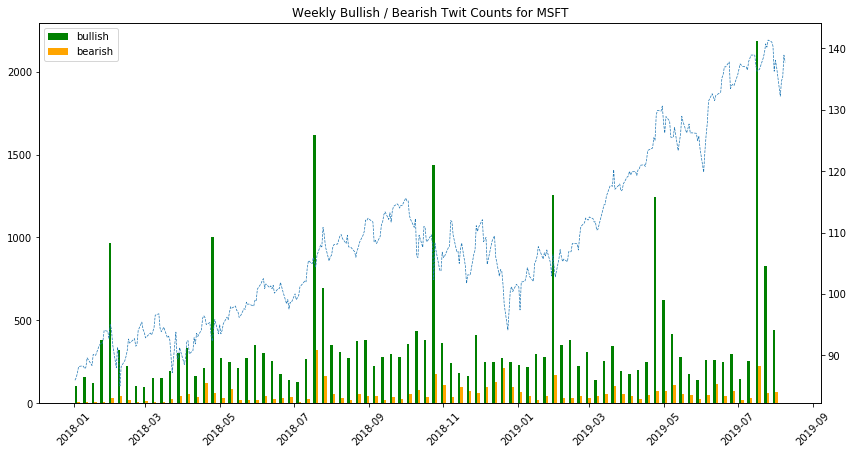

In [238]:
myFmt = md.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(14, 7))
# shak_weely_df.plot(kind='bar', ax=ax)
b1 = ax.bar(num_dates - 2, shak_weely_df['Bullish'], label='bullish', color='g', width=2, align='center')
b2 = ax.bar(num_dates, shak_weely_df['Bearish'], label='bearish', color='orange', width=2, align='center')

# Set major x ticks on Mondays.
ax.xaxis.set_major_locator(
#     matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO)
    matplotlib.dates.MonthLocator()
)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)

ax2 = ax.twinx()
l1 = ax2.plot(stock_df.index, stock_df['close'], linewidth=0.7, linestyle='--')

ax.legend('upper right', handles=[b1, b2])
plt.title('Weekly Bullish / Bearish Twit Counts for {}'.format(ticker))
plt.show()

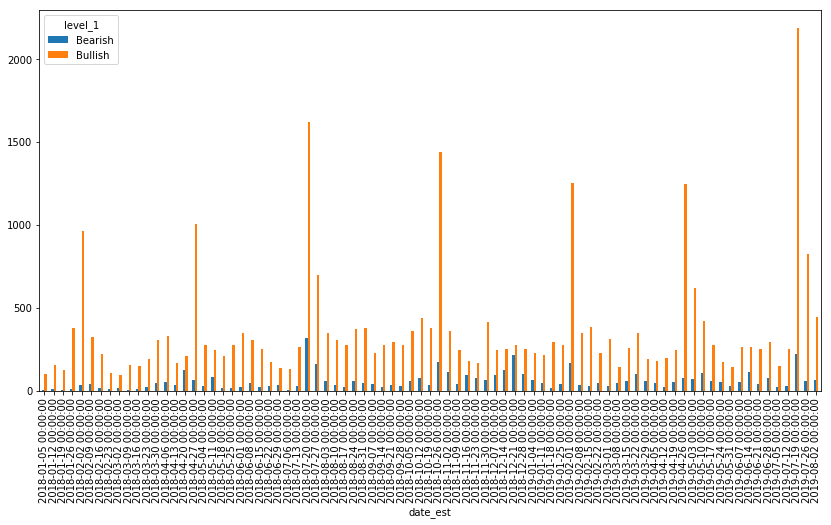

In [239]:
myFmt = md.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(14, 7))
shak_weely_df.plot(kind='bar', ax=ax)

In [145]:
ax.xaxis.get_major_formatter()

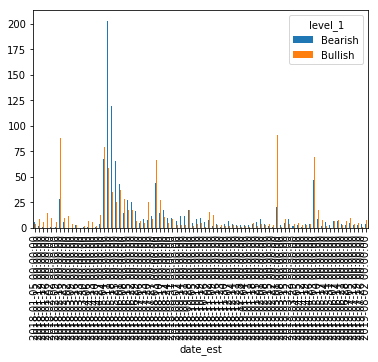

In [142]:
shak_weely_df.plot(kind='bar')